# Contents
This notebook will contain all the workflow for testing the result of our neural network model, such as :
1. Score on testing dataset
2. Visualize output in testing dataset for each mask
3. Run some automatic tests on difficult situations

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "" 
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

/home/simon/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
model = load_model('unet_small.cp')
X_valid = np.load('X_valid.npy')
y_valid = np.load('y_valid.npy')

In [4]:
idx = 0
d = {}
d[0] = 'board'
d[1] = 'queen'
d[2] = 'king'
d[3] = 'pawn'
d[4] = 'bishop'
d[5] = 'knight'
d[6] = 'tower'

In [5]:
def print_result(idx):
    f, axarr = plt.subplots(7, 3, figsize = (20, 40))

    y_pred = model.predict(X_valid[idx:idx + 1])
    for i in range(7):
        axarr[i, 0].imshow(y_pred[0,:,:,i])
        axarr[i, 0].set_title('Prediction of {}'.format(d[i]))
        axarr[i, 1].imshow(y_valid[idx,:,:,i])
        axarr[i, 1].set_title('Ground truth of {}'.format(d[i]))
        axarr[i, 2].imshow(X_valid[idx])
    plt.show()

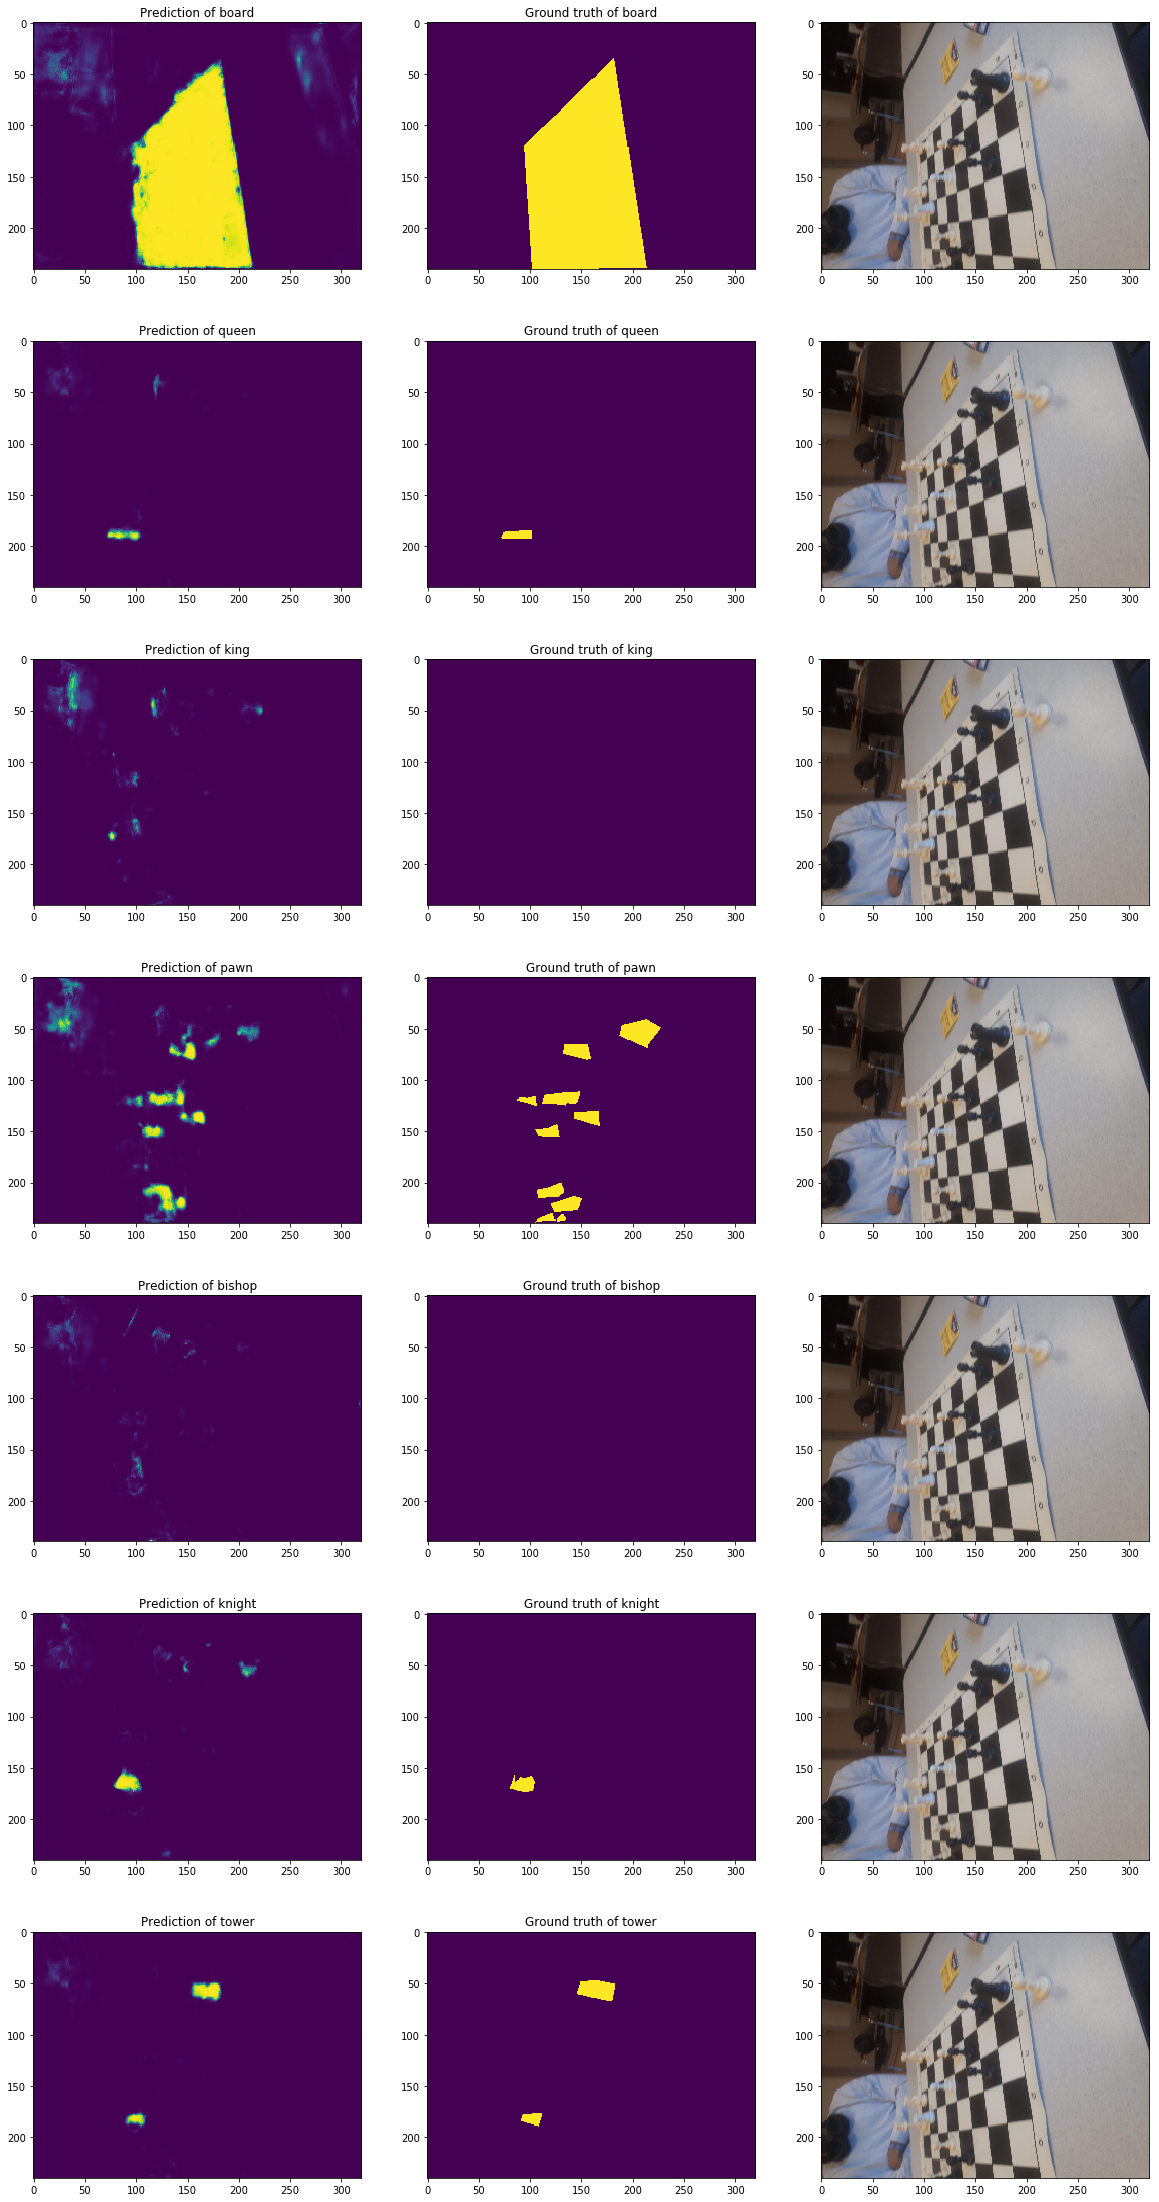

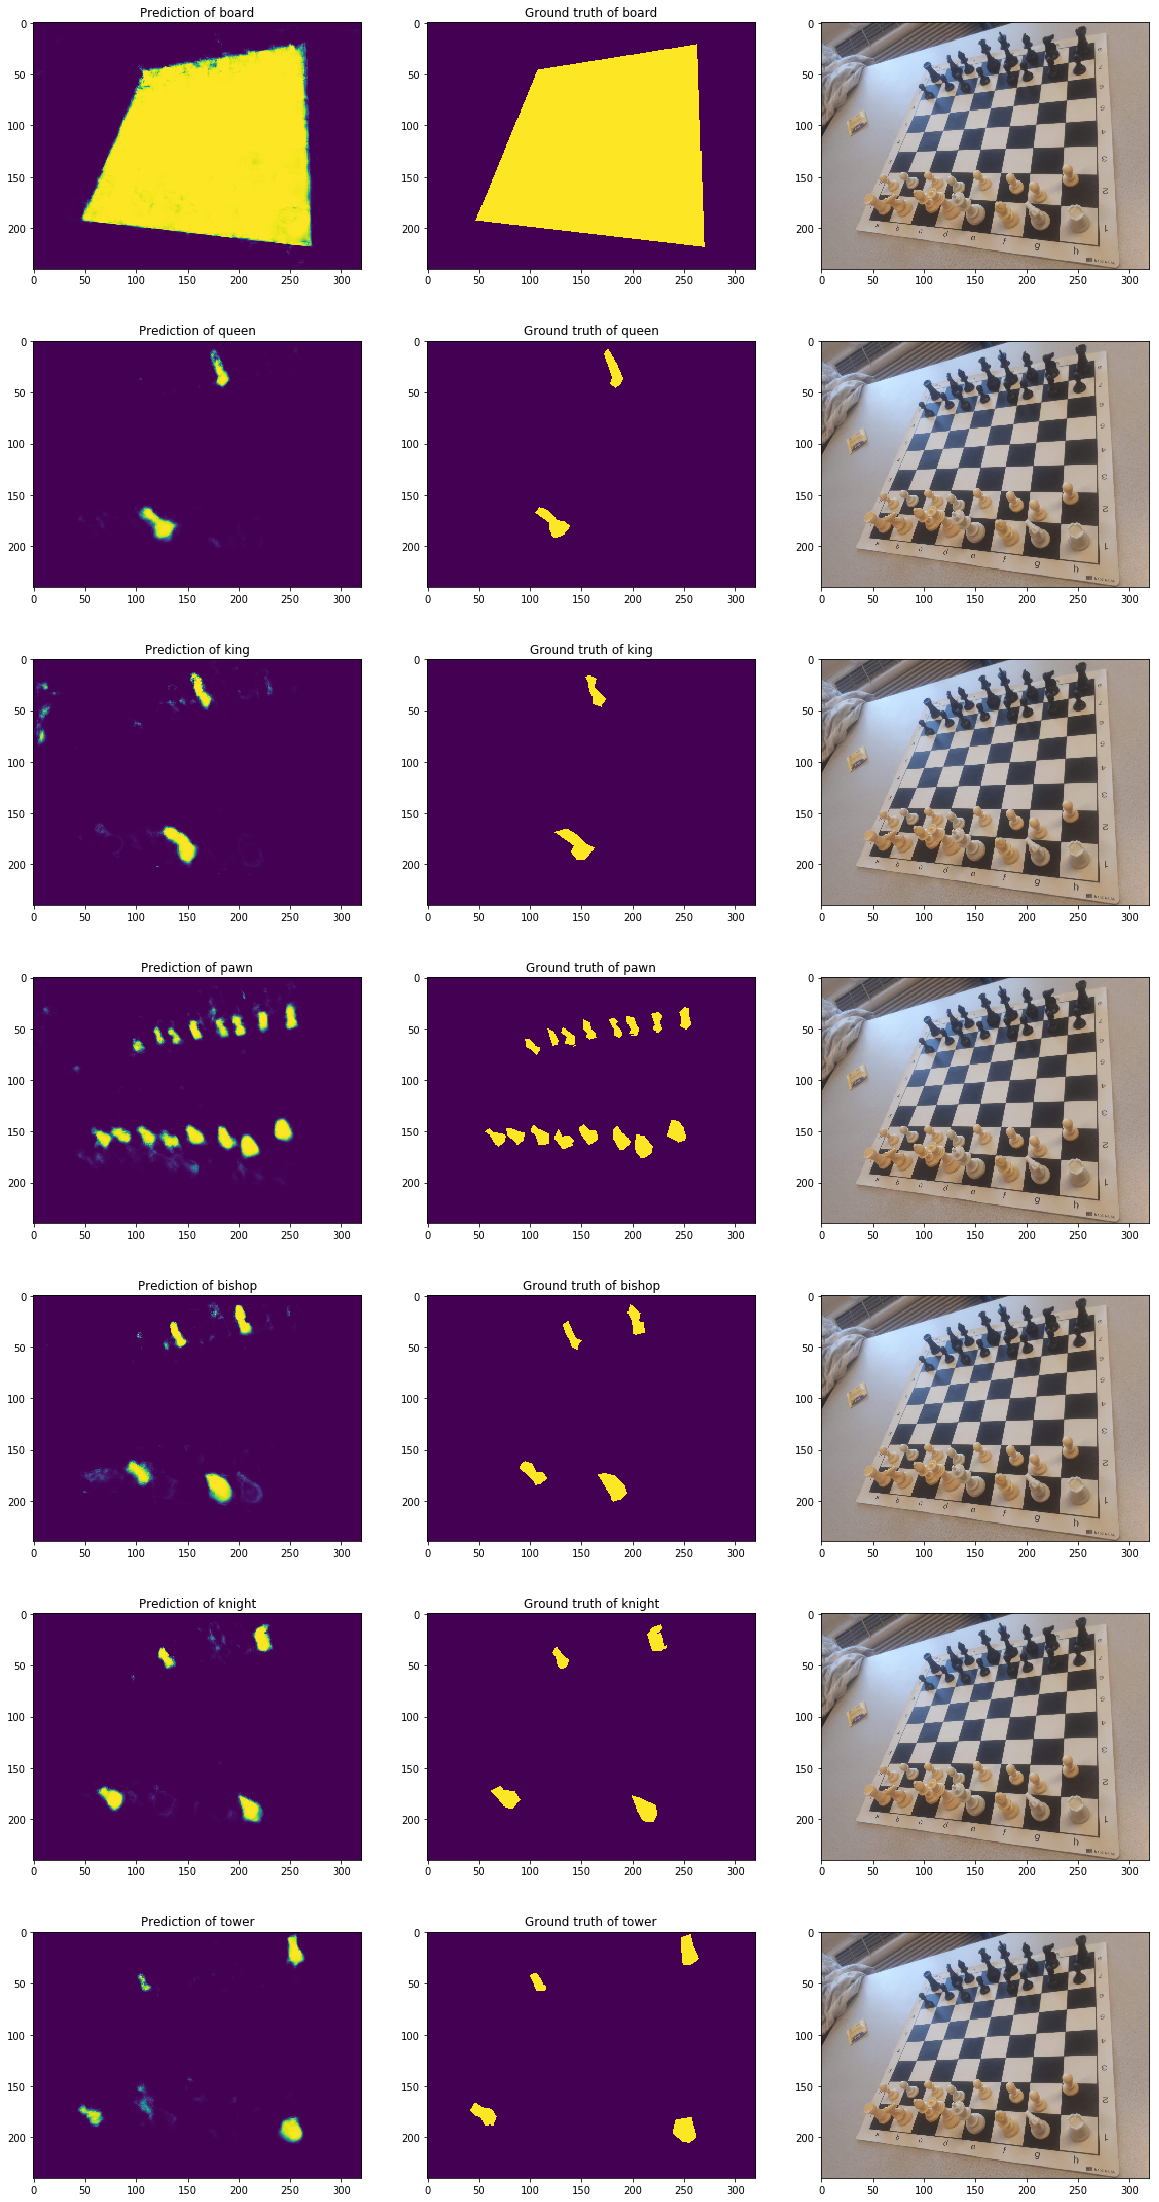

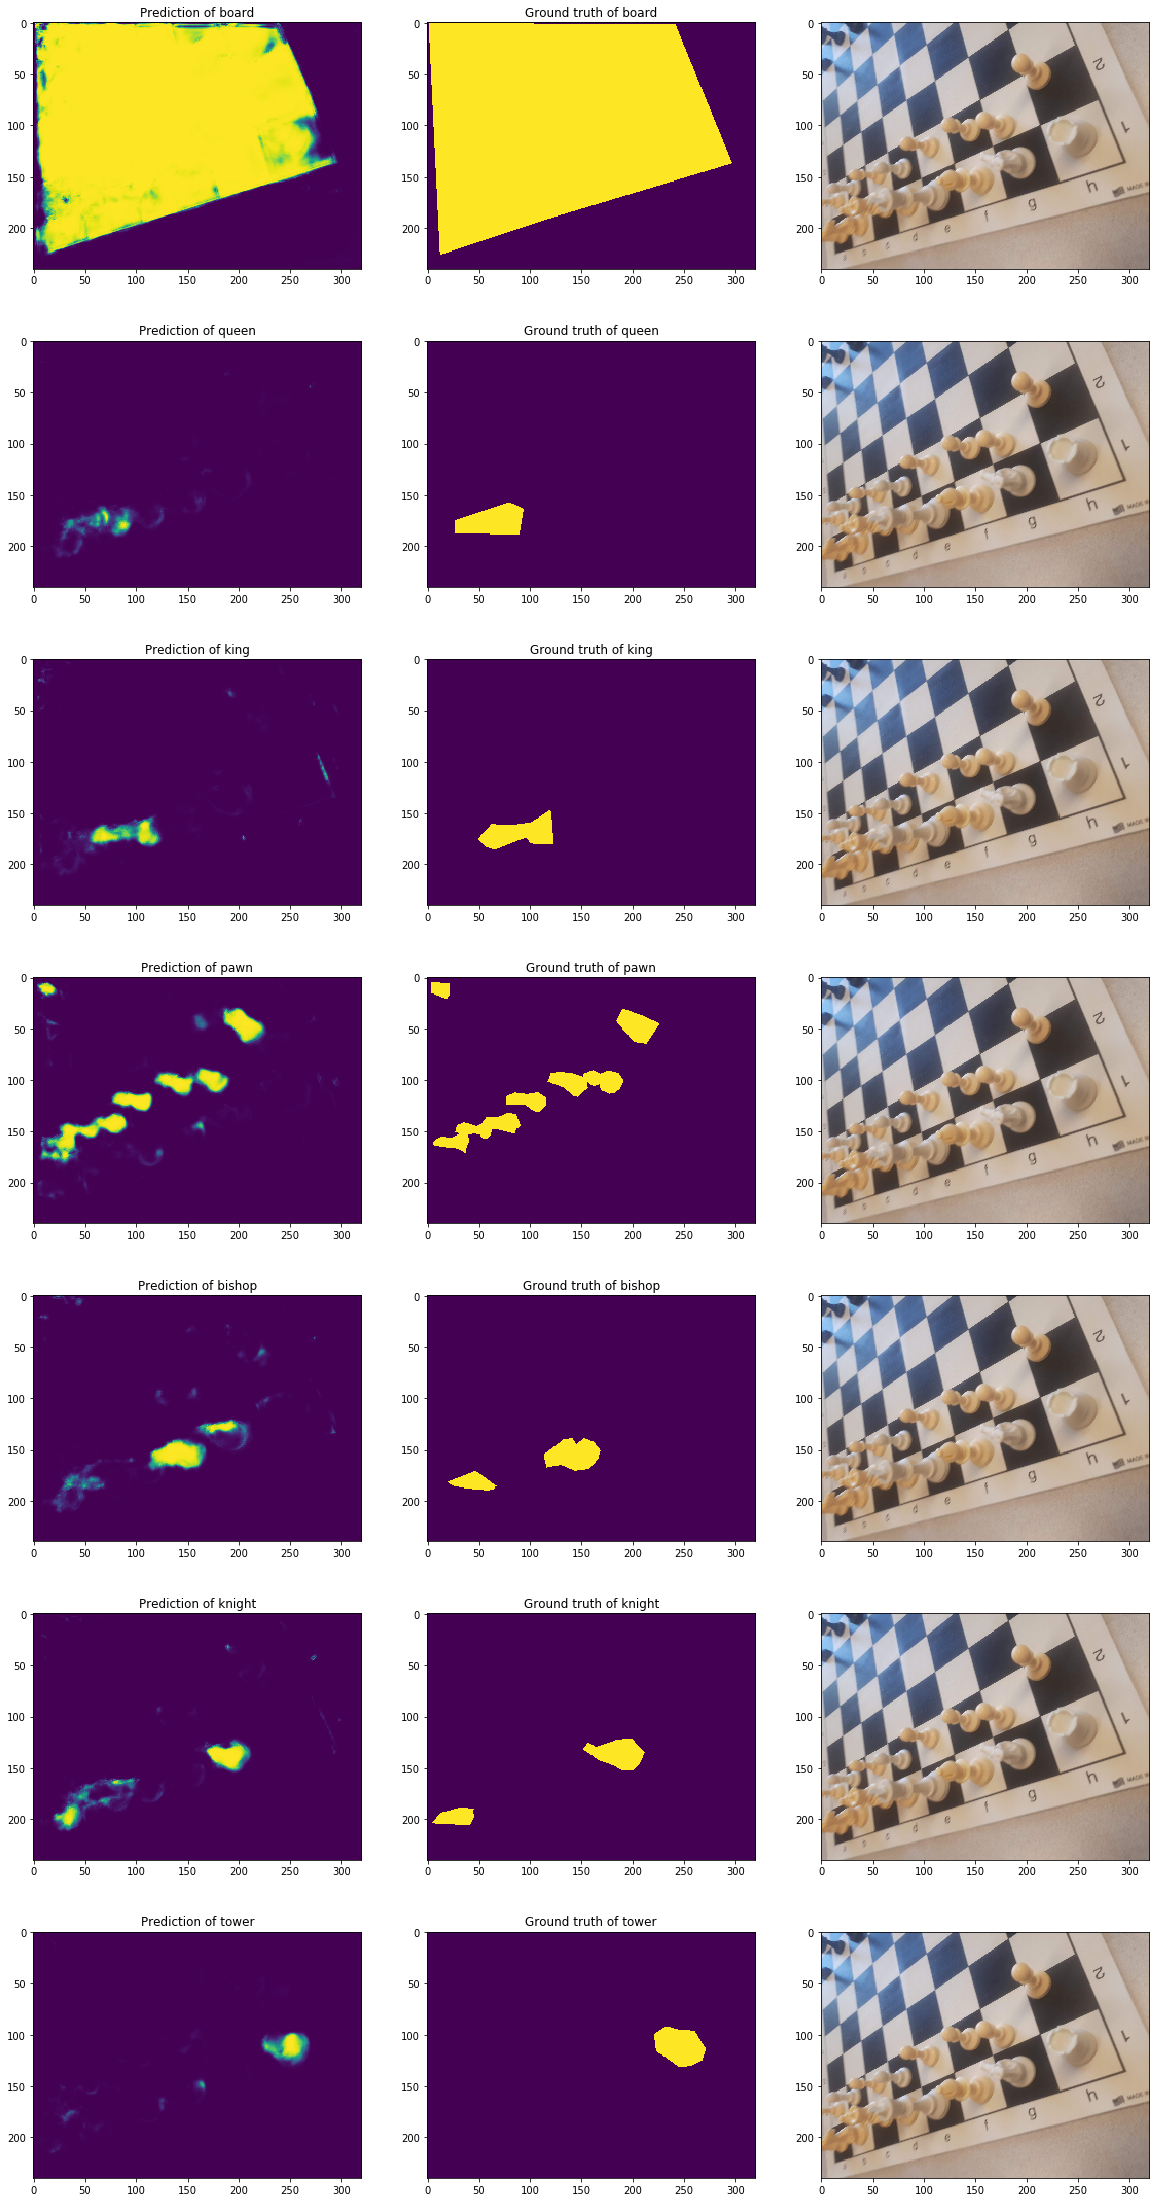

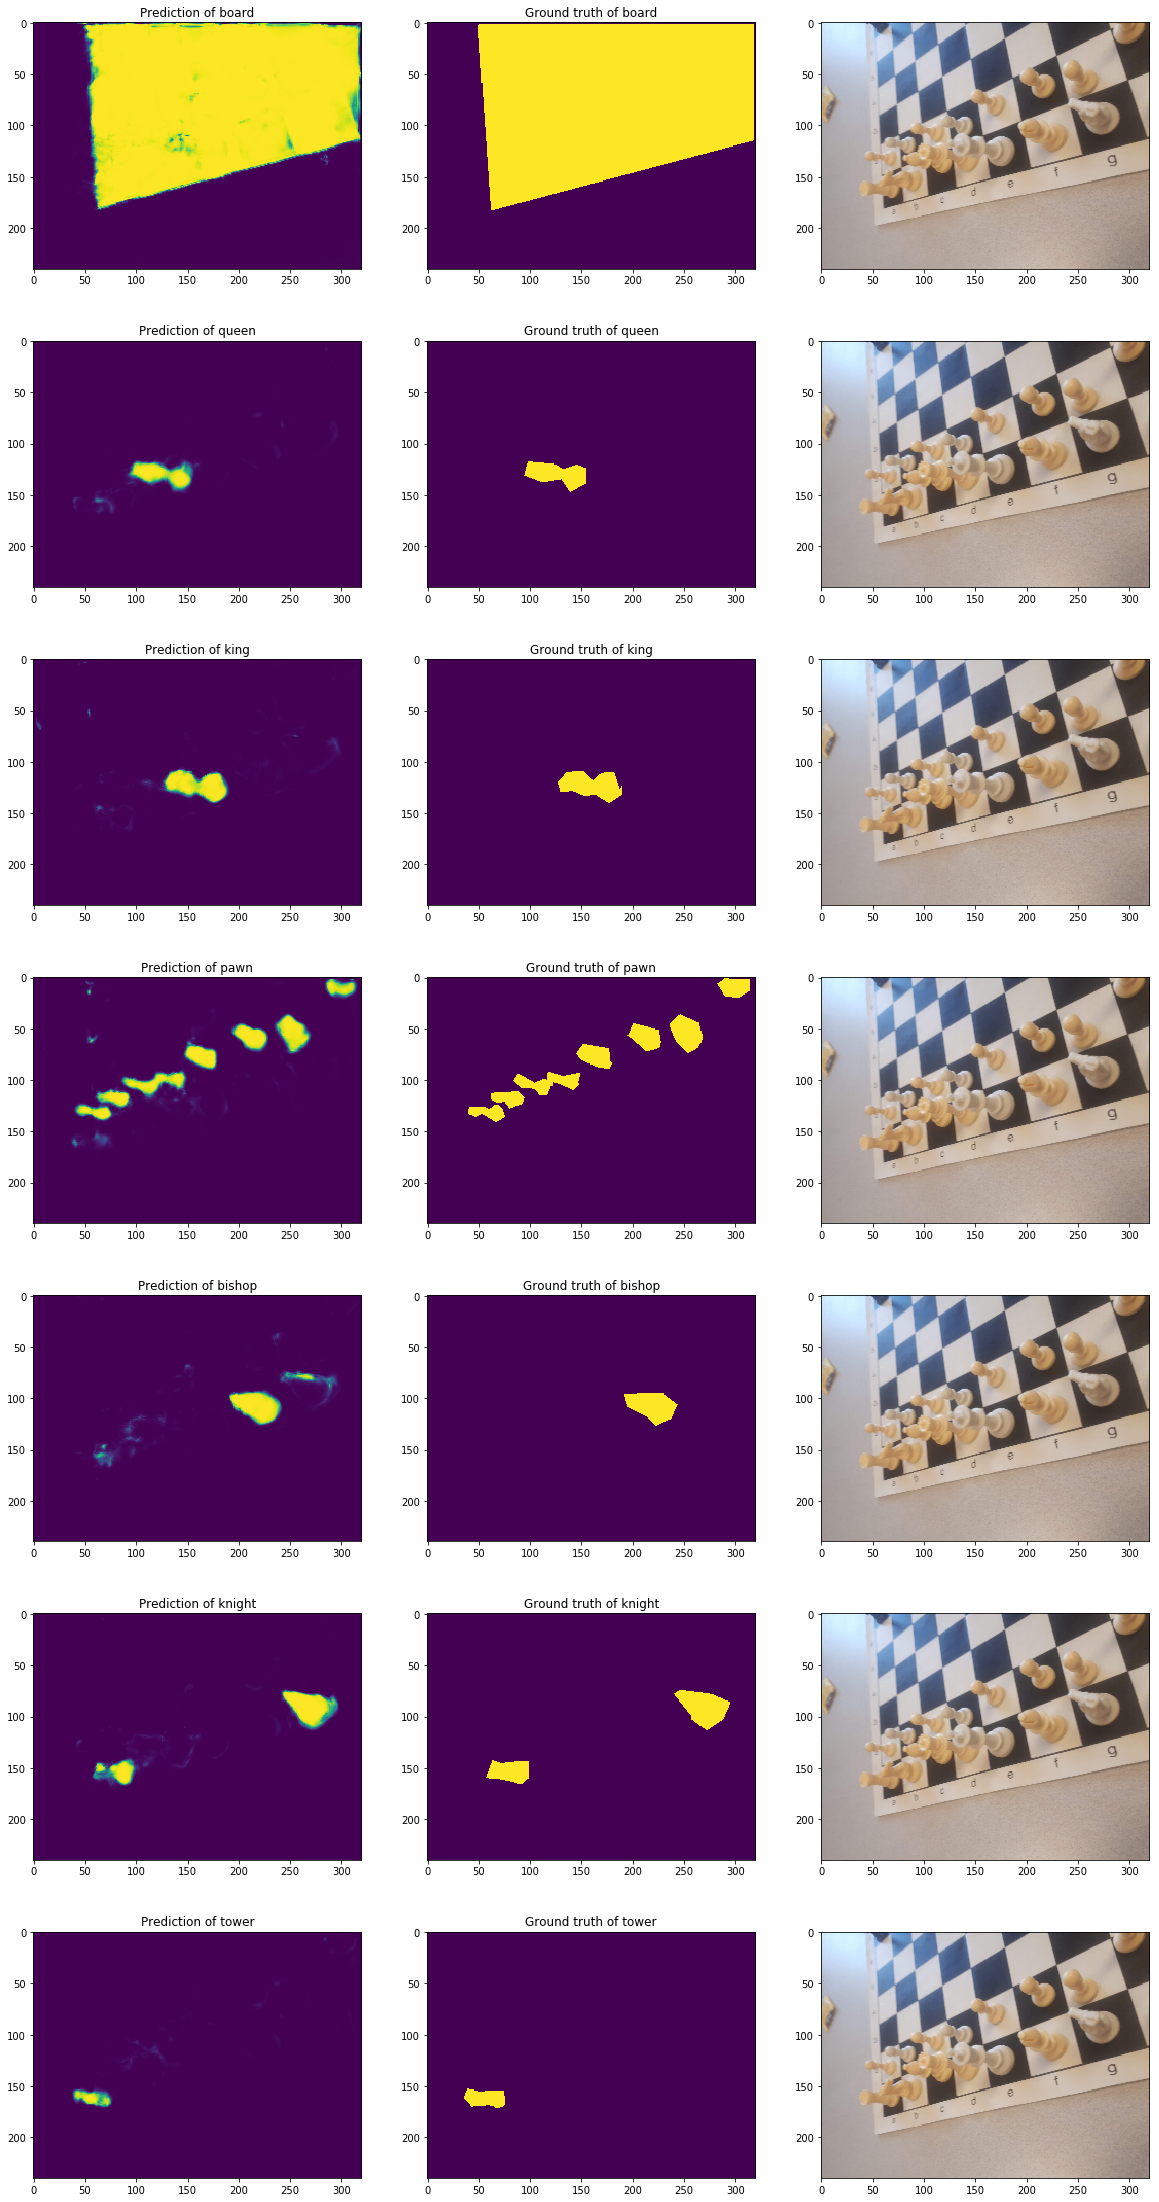

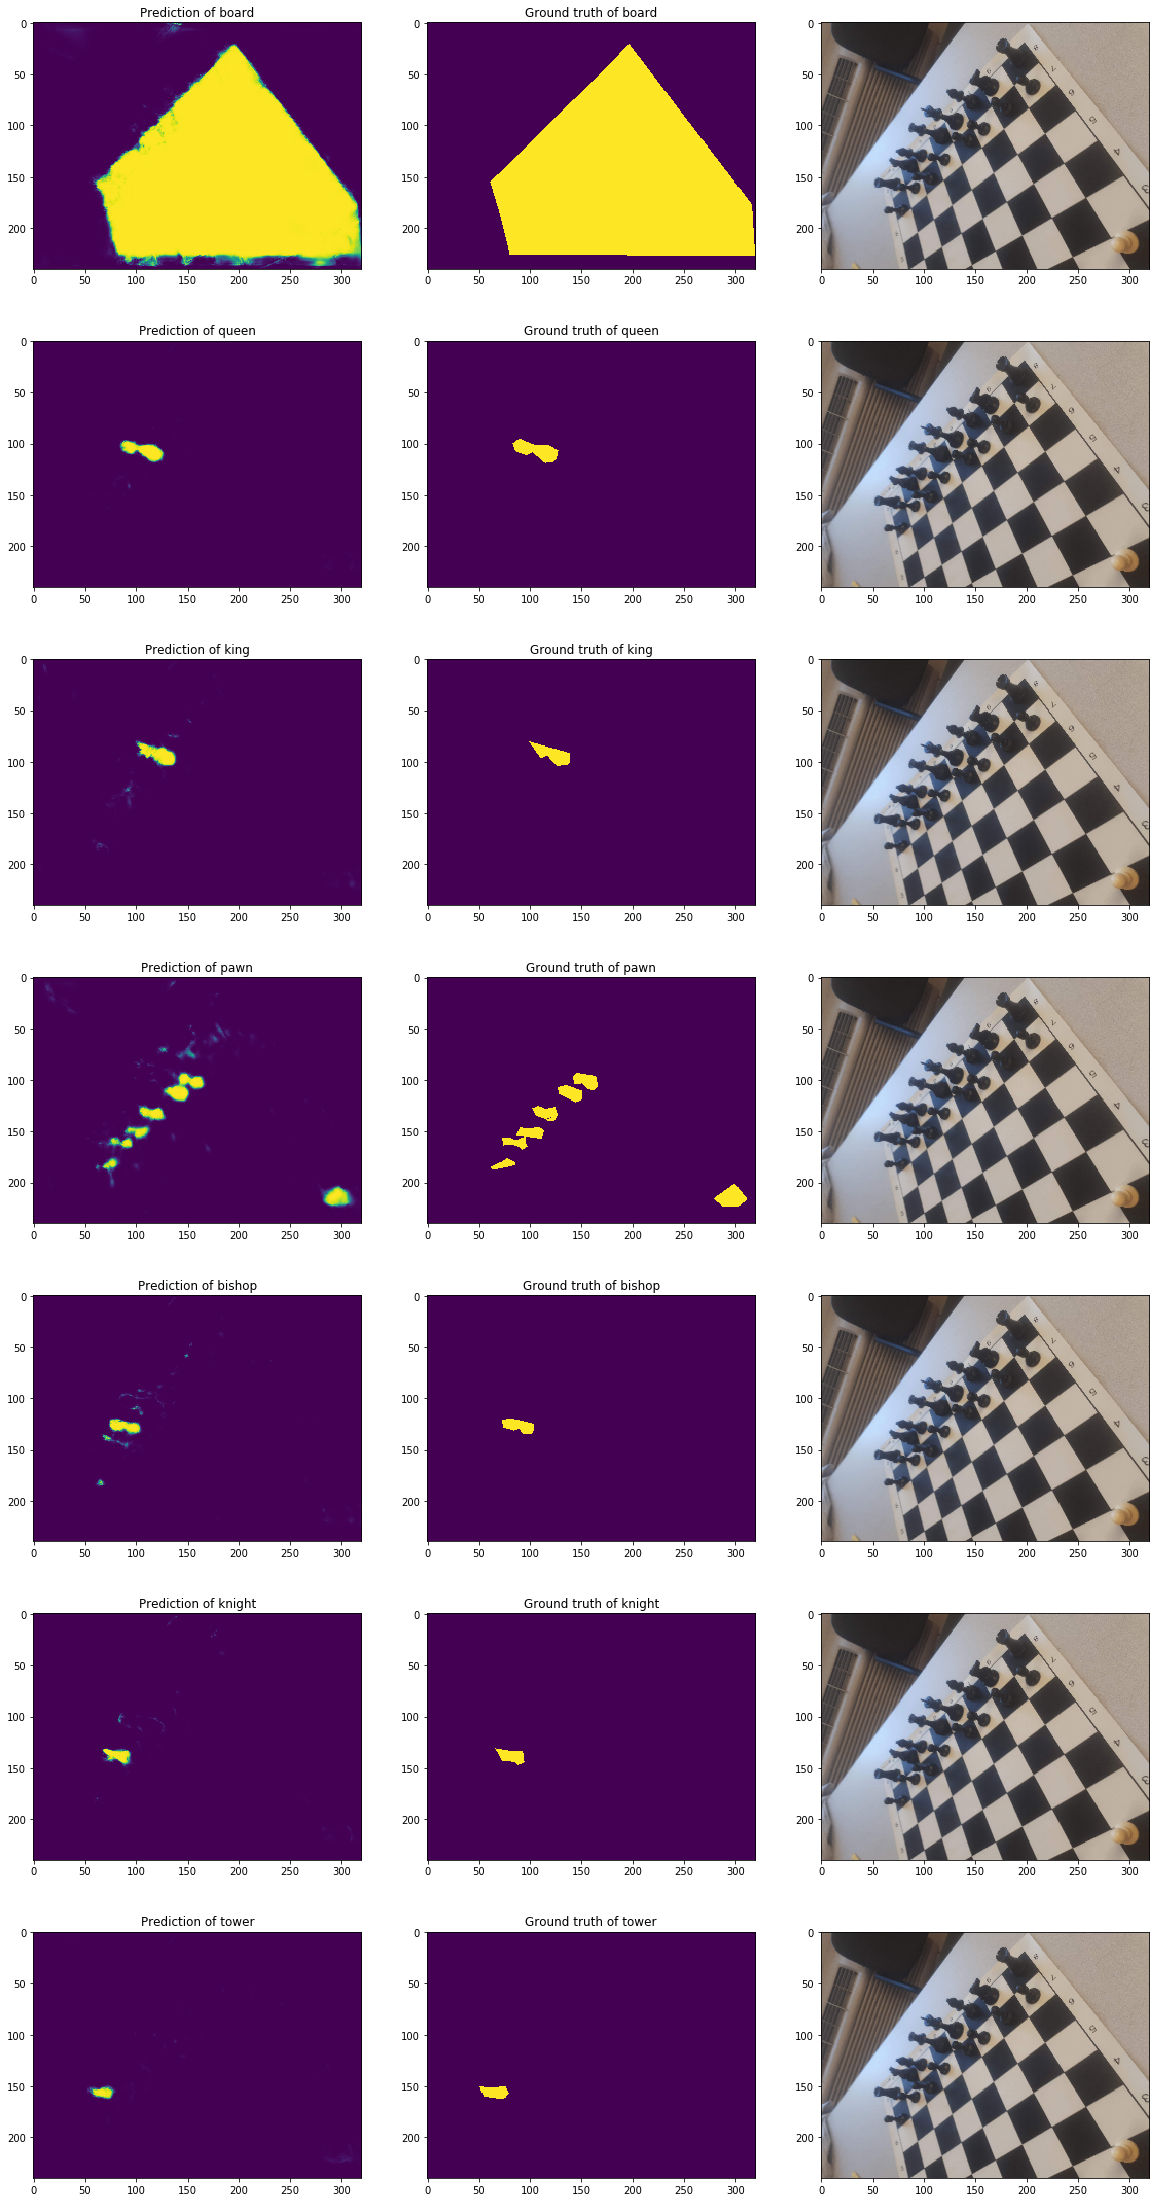

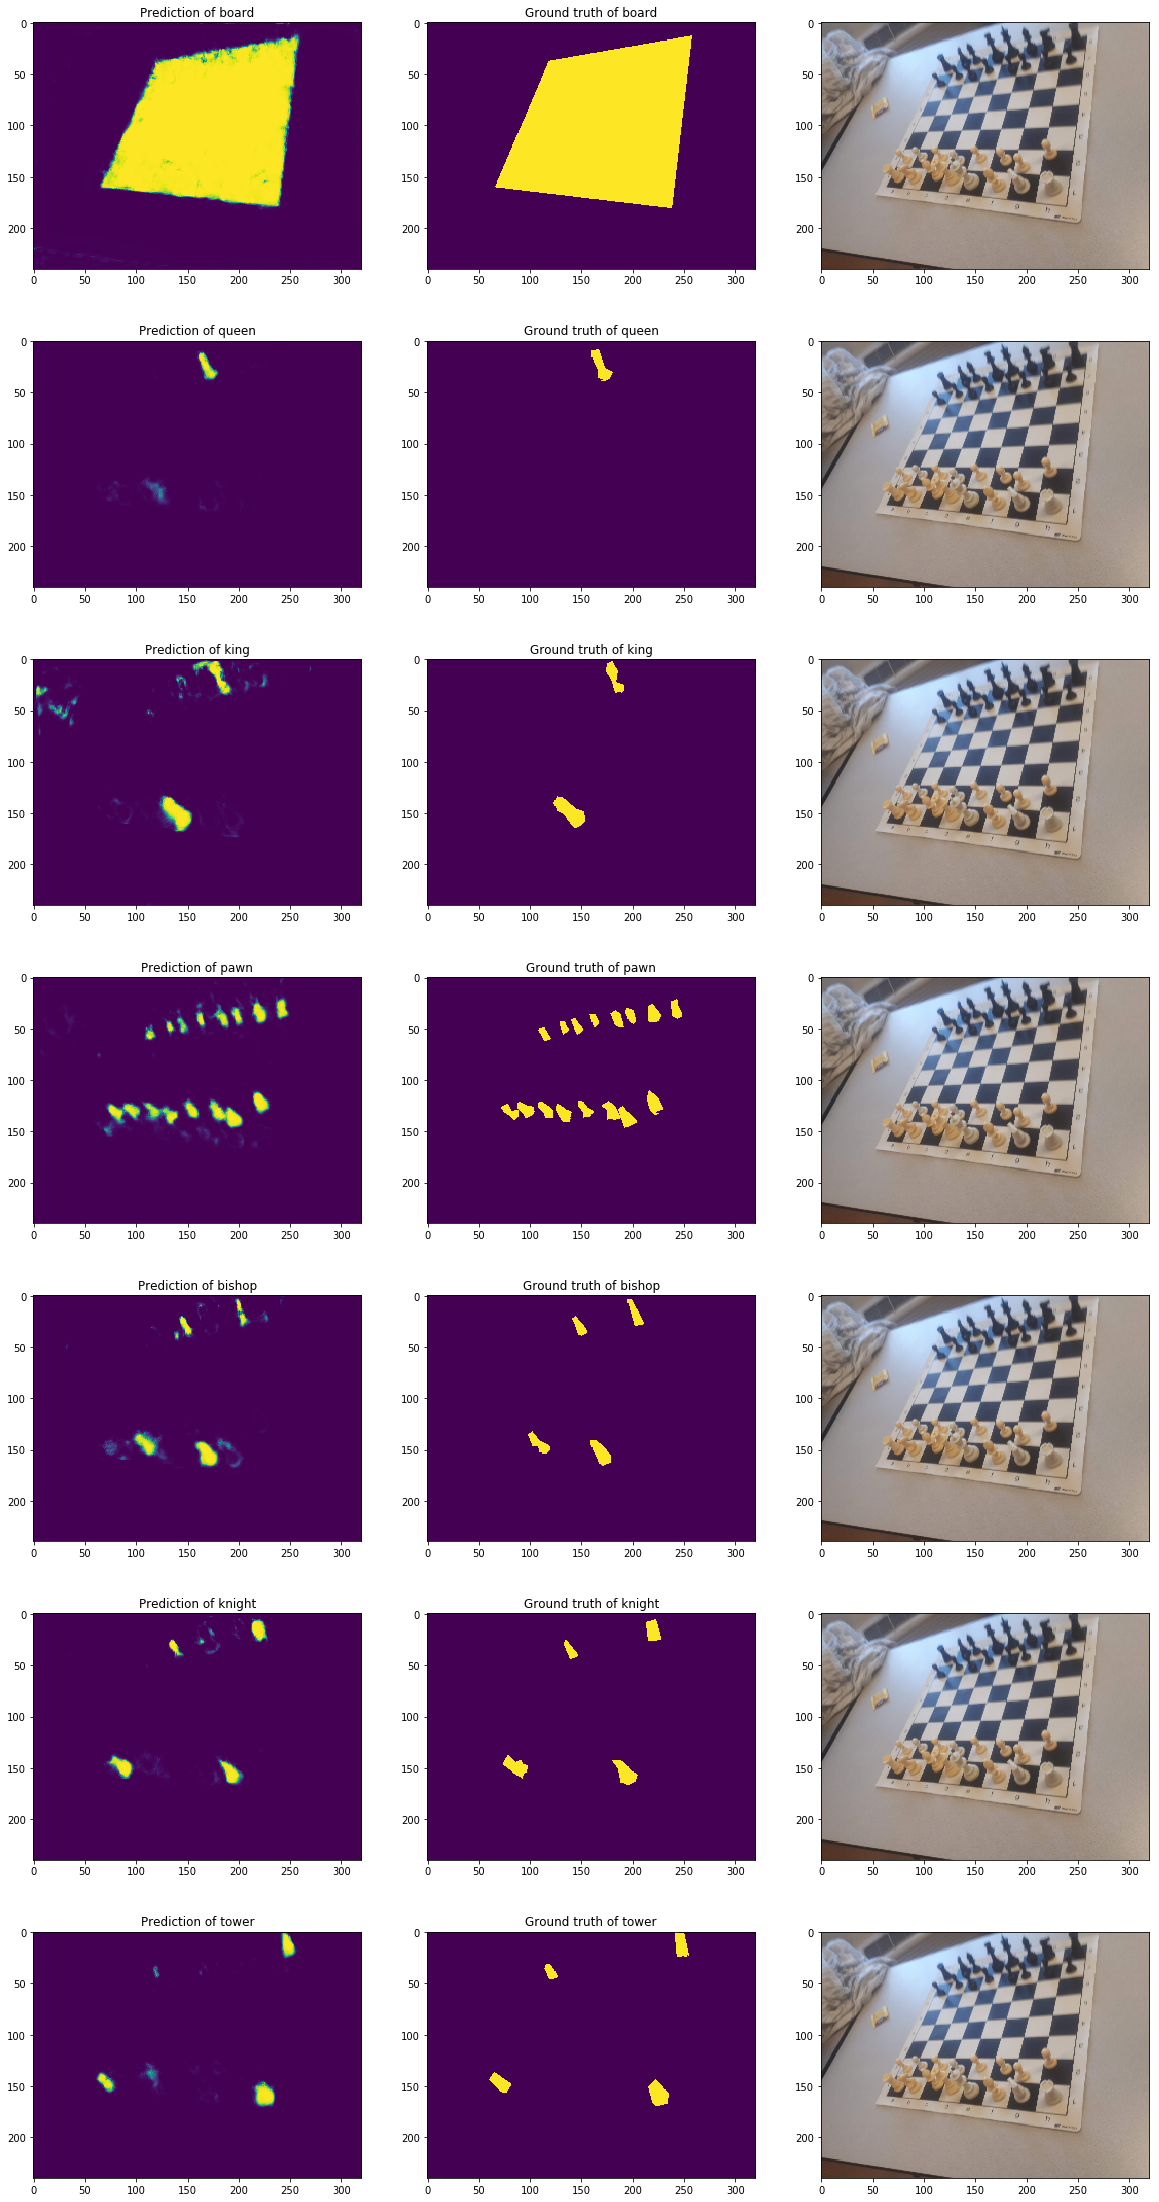

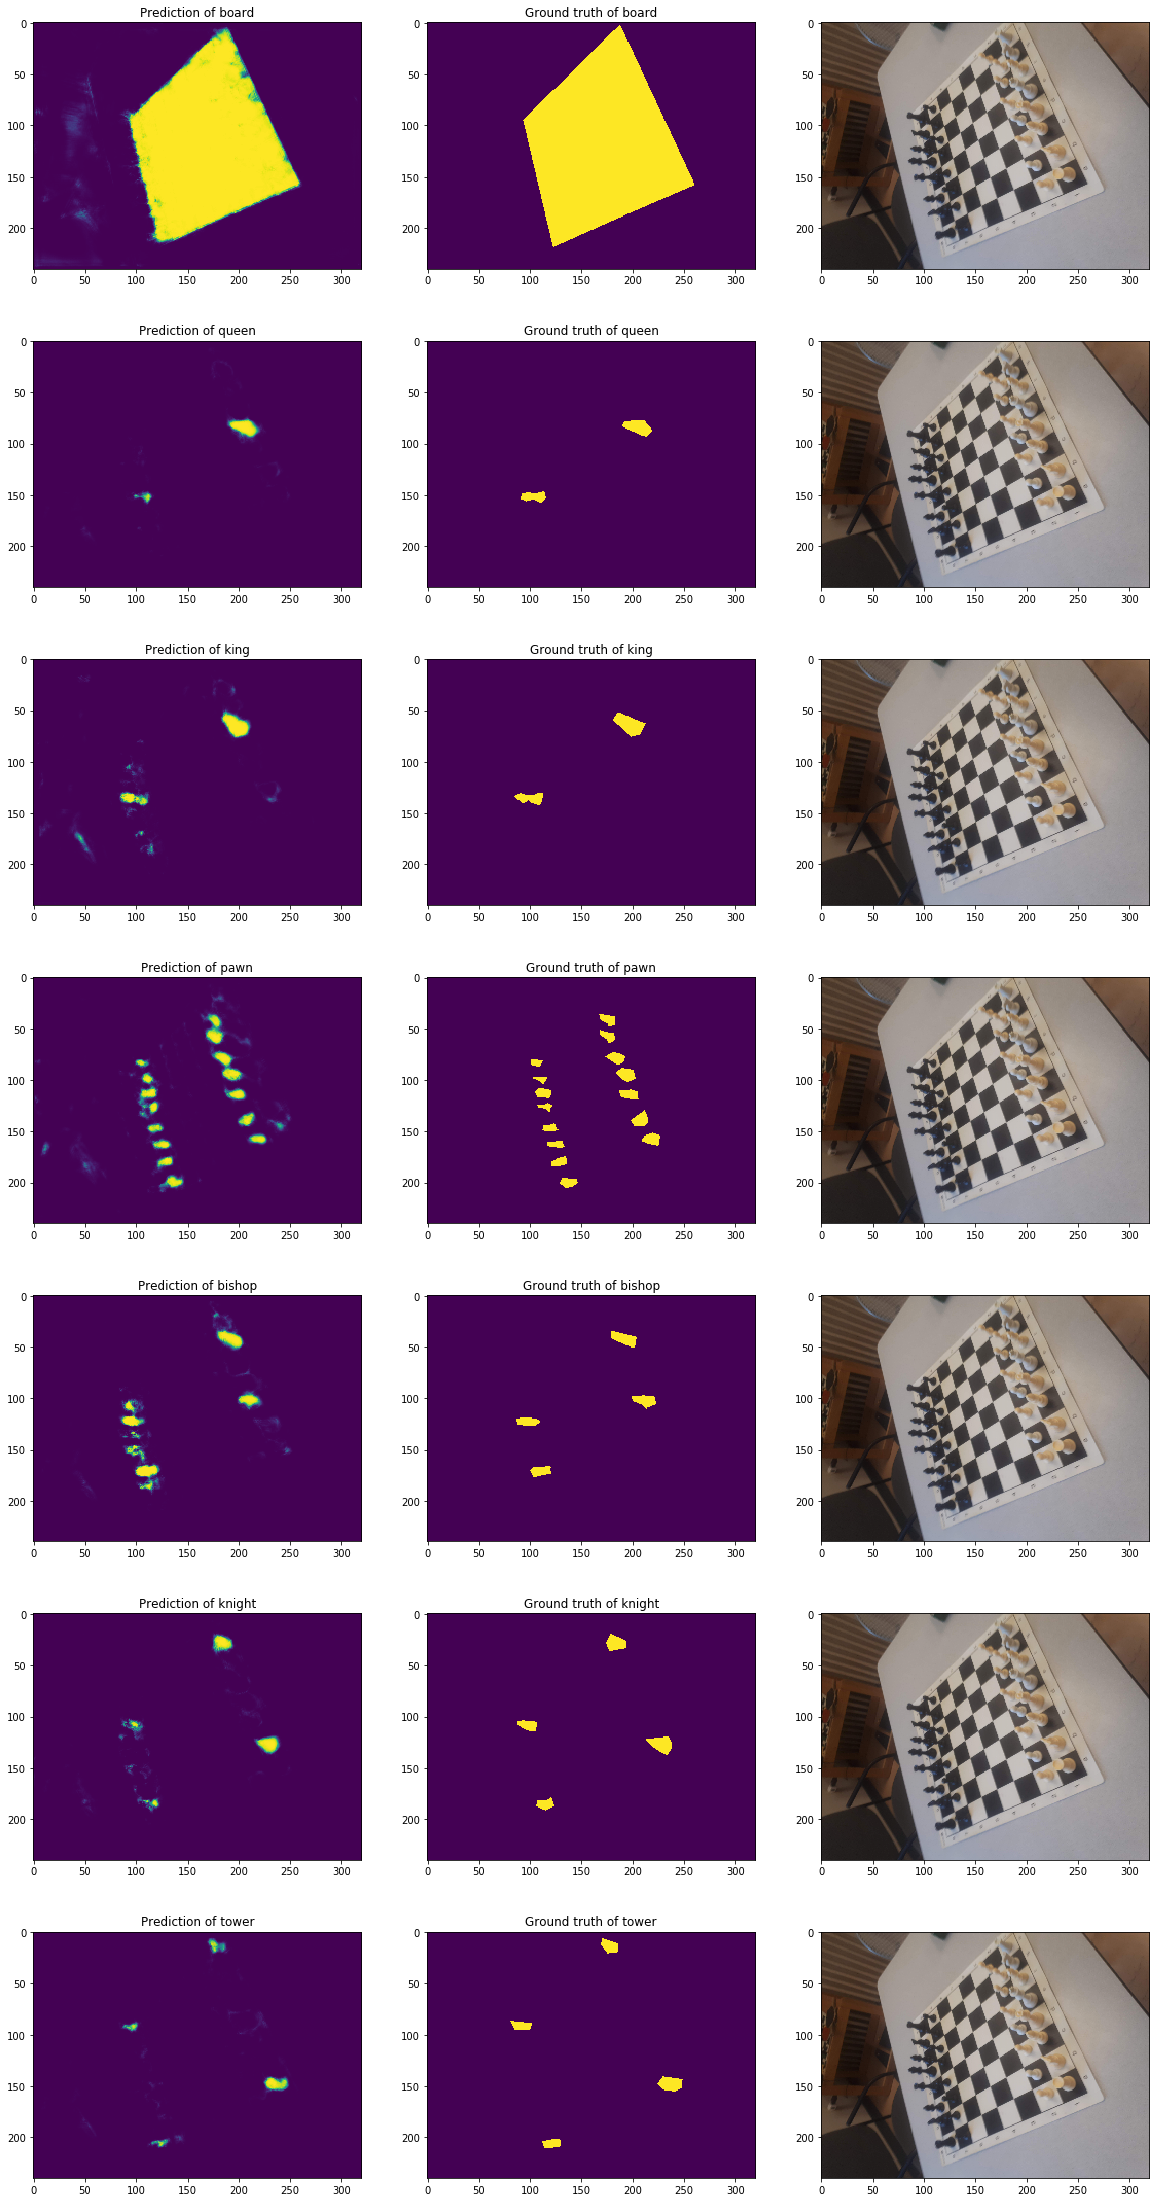

In [6]:
for idx in range(len(X_valid)):
    print_result(idx)